<a href="https://colab.research.google.com/github/t0x1c-bi4/summer-praktika/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импортируем необходимые модули


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow. keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential, layers

## Выгружаем датасет


In [ ]:
import pathlib
from google.colab import drive

drive.mount('/content/drive')

dataset_dir = pathlib.Path("/content/drive/My Drive/aaaa/dataset")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Создание и кэширование датасетов

In [ ]:
# Параметры для загрузки данных
batch_size = 32
img_width = 180
img_height = 180

# Создание набора данных для обучения
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Создание набора данных для валидации
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Получение классов
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Кэширование и предварительная загрузка данных
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 500 files belonging to 10 classes.
Using 400 files for training.
Found 500 files belonging to 10 classes.
Using 100 files for validation.
Class names: ['Ahead only', 'Bus-stop', 'Give way', 'Hump ', 'No entry ', 'No overtaking', 'No waiting', 'Pedestrian crossing ahead', 'Priority road', 'Slippery road']


Создание модели, компилирование и summary

In [ ]:
# Создание модели
num_classes = len(class_names)
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # аугментация
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.4),
    layers.experimental.preprocessing.RandomZoom(0.35),
    layers.experimental.preprocessing.RandomContrast(0.5),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Компиляция модели
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Вывод информации о модели
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip_3 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_3 (RandomR  (None, 180, 180, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_3 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 random_contrast_3 (RandomC  (None, 180, 180, 3)       0         
 ontrast)                                                        
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)     

Обучение модели

Epoch 1/20
13/13 [==============================] - 18s 1s/step - loss: 2.3173 - accuracy: 0.1574 - val_loss: 2.1848 - val_accuracy: 0.1700
Epoch 2/20
13/13 [==============================] - 15s 1s/step - loss: 2.0023 - accuracy: 0.2437 - val_loss: 1.6898 - val_accuracy: 0.3800
Epoch 3/20
13/13 [==============================] - 15s 1s/step - loss: 1.6008 - accuracy: 0.4213 - val_loss: 1.4174 - val_accuracy: 0.5100
Epoch 4/20
13/13 [==============================] - 15s 1s/step - loss: 1.4599 - accuracy: 0.4873 - val_loss: 1.2191 - val_accuracy: 0.5700
Epoch 5/20
13/13 [==============================] - 15s 1s/step - loss: 1.2668 - accuracy: 0.5482 - val_loss: 1.0496 - val_accuracy: 0.6500
Epoch 6/20
13/13 [==============================] - 15s 1s/step - loss: 1.1212 - accuracy: 0.6041 - val_loss: 0.9621 - val_accuracy: 0.6700
Epoch 7/20
13/13 [==============================] - 15s 1s/step - loss: 0.9970 - accuracy: 0.6472 - val_loss: 0.9070 - val_accuracy: 0.7200
Epoch 8/20
13/13 [==

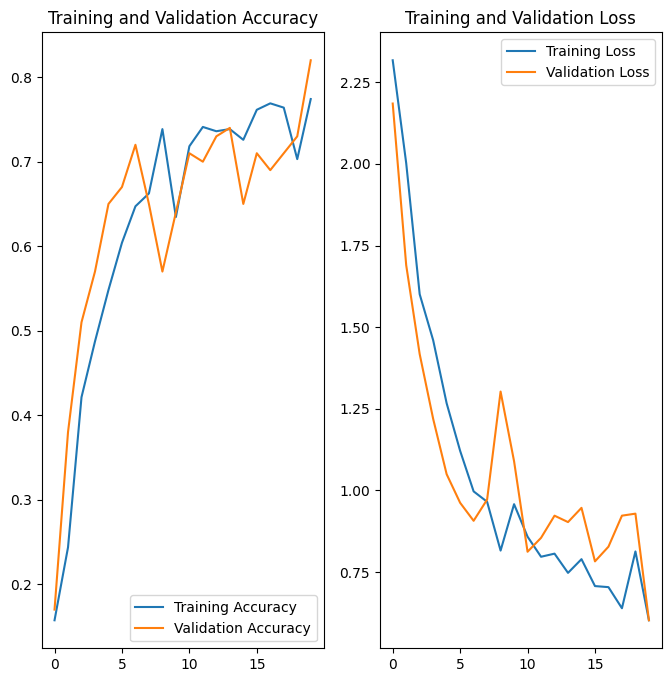

In [ ]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Визуализация результатов обучения и валидации
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Путь к папке на вашем Google Диске, куда будет сохранена модель
save_model_path = '/content/drive/My Drive/aaaa/my_model'

# Сохранение модели
model.save(save_model_path, save_format='tf')


Image shape: (1, 180, 180, 3)
Image pixel values:
[[[40. 36.  7.]
  [25. 24.  0.]
  [23. 22.  0.]
  ...
  [32. 36.  9.]
  [30. 34.  7.]
  [40. 43. 14.]]

 [[40. 36.  7.]
  [27. 26.  0.]
  [25. 24.  0.]
  ...
  [66. 69. 40.]
  [43. 46. 17.]
  [31. 34.  5.]]

 [[43. 39. 10.]
  [32. 31.  1.]
  [29. 28.  0.]
  ...
  [79. 82. 53.]
  [58. 61. 32.]
  [35. 38.  9.]]

 ...

 [[ 8.  8.  0.]
  [ 5.  5.  0.]
  [ 7.  7.  0.]
  ...
  [50. 43. 14.]
  [41. 36.  7.]
  [60. 56. 27.]]

 [[13. 11.  0.]
  [11.  9.  0.]
  [13. 11.  0.]
  ...
  [32. 25.  0.]
  [29. 23.  0.]
  [49. 48. 20.]]

 [[17. 13.  1.]
  [16. 12.  0.]
  [17. 14.  0.]
  ...
  [38. 32.  6.]
  [35. 31.  6.]
  [24. 22.  0.]]]
1/1 [==============================] - 0s 185ms/step
На изображении скорее всего Pedestrian crossing ahead (73.76% вероятность)


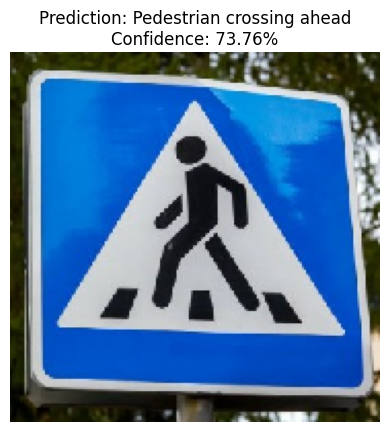

In [ ]:
from google.colab import drive
from tensorflow.keras.preprocessing import image
import os

example_image_path = '/content/drive/My Drive/aaaa/test/Снимок экрана 2024-05-26 225424.jpg'

# Предобработка изображения
img_height, img_width = 180, 180  # размеры изображения, используемые в модели
img = tf.keras.utils.load_img(example_image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # создаем батч из одного изображения
print(f"Image shape: {img_array.shape}")
print(f"Image pixel values:\n{img_array[0]}")

# Предсказание
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Вывод результата
print(f"На изображении скорее всего {class_names[np.argmax(score)]} ({100 * np.max(score):.2f}% вероятность)")

# Отображение изображения
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {class_names[np.argmax(score)]}\nConfidence: {100 * np.max(score):.2f}%")
plt.show()

Телеграмм-бот

In [ ]:
import telebot
import tensorflow as tf
import numpy as np
import os
from google.colab import drive

drive.mount('/content/drive')

# Инициализация бота
bot = telebot.TeleBot("6610580996:AAE3TVb8q9sibFndlnu7t_FqjiiJ8VeHC5Q")

# Загрузка модели
model = tf.keras.models.load_model("/content/drive/My Drive/aaaa/my_model")

# Получение классов из модели
class_names = ['Ahead only', 'Bus-stop', 'Give way', 'Hump', 'No entry',
               'No overtaking', 'No waiting', 'Pedestrian crossing ahead',
               'Priority road', 'Slippery road']

# Функция для предсказания знака
def predict_sign(image_path):
    try:
        img = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, 0)  # создаем батч из одного изображения

        # Предсказание
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])  # Применяем softmax к логитам

        predicted_class = class_names[np.argmax(score)]
        confidence = 100 * np.max(score)

        return predicted_class, confidence
    except Exception as e:
        print(f"Error in predict_sign: {e}")
        return None, None

# Функция для обработки сообщений с изображениями
@bot.message_handler(content_types=['photo'])
def handle_image(message):
    try:
        # Получаем информацию о файле из сообщения
        file_id = message.photo[-1].file_id
        file_info = bot.get_file(file_id)
        file_path = file_info.file_path

        # Скачиваем изображение
        downloaded_file = bot.download_file(file_path)

        # Сохраняем изображение с именем "temp.jpg"
        with open('temp.jpg', 'wb') as new_file:
            new_file.write(downloaded_file)

        # Предсказываем знак
        predicted_sign, confidence = predict_sign('temp.jpg')

        if predicted_sign is not None:
            # Отправляем ответ пользователю
            bot.reply_to(message, f"На изображении скорее всего {predicted_sign} ({confidence:.2f}% вероятность)")
        else:
            bot.reply_to(message, "Произошла ошибка при обработке изображения.")
    except Exception as e:
        print(f"Error in handle_image: {e}")
        bot.reply_to(message, "Произошла ошибка при обработке изображения.")

@bot.message_handler(content_types=['document'])
def handle_document(message):
    try:
        # Получаем информацию о файле из сообщения
        file_id = message.document.file_id
        file_info = bot.get_file(file_id)
        file_path = file_info.file_path

        # Скачиваем изображение
        downloaded_file = bot.download_file(file_path)

        # Сохраняем изображение с именем "temp.jpg"
        with open('temp.jpg', 'wb') as new_file:
            new_file.write(downloaded_file)

        # Предсказываем знак
        predicted_sign, confidence = predict_sign('temp.jpg')

        if predicted_sign is not None:
            # Отправляем ответ пользователю
            bot.reply_to(message, f"На изображении скорее всего {predicted_sign} ({confidence:.2f}% вероятность)")
        else:
            bot.reply_to(message, "Произошла ошибка при обработке изображения.")
    except Exception as e:
        print(f"Error in handle_document: {e}")
        bot.reply_to(message, "Произошла ошибка при обработке изображения.")

# Функция для обработки текстовых сообщений
@bot.message_handler(content_types=['text'])
def handle_text(message):
    bot.reply_to(message, "Я жду от вас только фотографии дорожных знаков :(")

# Запуск бота
bot.polling()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 28ms/step


In [2]:
pip install pyTelegramBotAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 1.9 MB/s eta 0:00:00
